Para resolver este ejercicio, primero definimos la función de Likelihood y las probabilidades posteriores, aplicando el teorema de Bayes. En este caso, queremos determinar la probabilidad posteriori del sesgo de la moneda (p), basándonos en el número de caras y secas observadas, utilizando dos priors: uno uniforme y otro gaussiano.La idea es comparar ambas distribuciones.
La probabilidad de obtener \( k \) caras en \( n \) lanzamientos, dada una probabilidad \( p \), está dada por la distribución binomial:

$$
L(p) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

donde:
- \( n = 100 \) es el número total de lanzamientos,
- \( k = 60 \) es el número de caras,
- \( p \) es la probabilidad de obtener cara (el parámetro que estamos buscando).
En este caso, el prior uniforme es \( P(p) = 1 \) para \( p \in [0, 1] \). Según el teorema de Bayes, la probabilidad posterior \( P(p \mid D) \) se calcula como:

$$
P(p \mid D) \propto L(p) P(p)
$$

donde \( D \) representa los datos observados. Debido al prior uniforme, simplemente multiplicamos la verosimilitud por \( P(p) = 1 \), lo que da como resultado:

$$
P(p \mid D) \propto p^{60} (1 - p)^{40}
$$
Para un prior gaussiano con media \( 0.5 \) y desviación estándar \( 0.1 \), la distribución prior es:

$$
P(p) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{(p - 0.5)^2}{2 \sigma^2} \right)
$$

donde \( \sigma = 0.1 \). Entonces, la probabilidad posterior es:

$$
P(p \mid D) \propto p^{60} (1 - p)^{40} \exp \left( -\frac{(p - 0.5)^2}{2 \times (0.1)^2} \right)
$$


In [99]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as st
from math import comb

In [100]:
Tiros=100
caras=60
secas=40

In [101]:
#Definimos la funcion verosimilitud, distribucion binomial
def likelihood(p,k,n):
    L=comb(n,k)*(p**k)*((1-p)**(n-k))
    return(L)

In [102]:
likelihood(p=100,k=60,n=100)

919584243022829686424313608970901706545258034539779347691797145274851643542927045193944587623372562004489720000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [103]:
#Queremos definir los priors, para esto necesitamos darle una suerte de condicion.

def priors_uniforme(p):
    if 0<=p<=1: 
        return(1) # Prior uniforme, constante en [0, 1]
    else:
        return(0)

In [104]:
print(priors_uniforme(p=0.1))
print(priors_uniforme(2))

1
0


In [105]:
#Ahora para definir la probabilidad posterior solo se multiplica el likelihood por el prior
def probabilidad_posterior_uniforme(p,k,n):
    L=likelihood(p,k,n)
    P=priors_uniforme(p)
    prob_post=L*P
    return(prob_post)

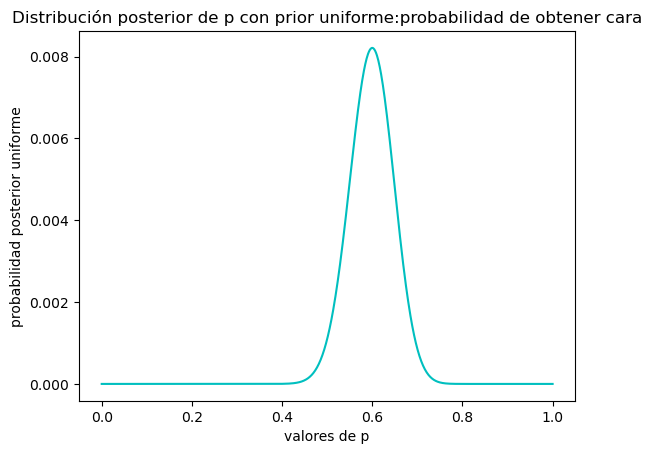

In [106]:
#Grafiquemos la probabilidad uniforme en principio
valores_p=np.linspace(0,1,1000)
probabilidades_unif = [] 
for p in valores_p:
    probabilidad = probabilidad_posterior_uniforme(p, caras, Tiros)
    probabilidades_unif.append(probabilidad)
p_unif_norm=probabilidades_unif/np.sum(probabilidades_unif)
plt.plot(valores_p,p_unif_norm,color='#00BFBF')
plt.xlabel('valores de p')
plt.ylabel('probabilidad posterior uniforme')
plt.title('Distribución posterior de p con prior uniforme:probabilidad de obtener cara')
plt.show()

Ahora queremos definir la distribucion gaussiana, ya tenemos definida la funcion likelihood, nos faltaria definir los prior gaussianos y luego la probabilidad posterior gaussiana.

In [107]:
def priors_gaussiano(p,mu=0.5,sigma=0.1):
    P= st.norm.pdf(p,mu,sigma) # Prior gaussiano centrado en 0.5 con desviación estándar 0.1
    return(P)

In [108]:
def probabilidad_posterior_gaussiana(p,k,n):
    P=priors_gaussiano(p,mu=0.5,sigma=0.1)
    L=likelihood(p,k,n)
    prob_post=P*L
    return(prob_post)

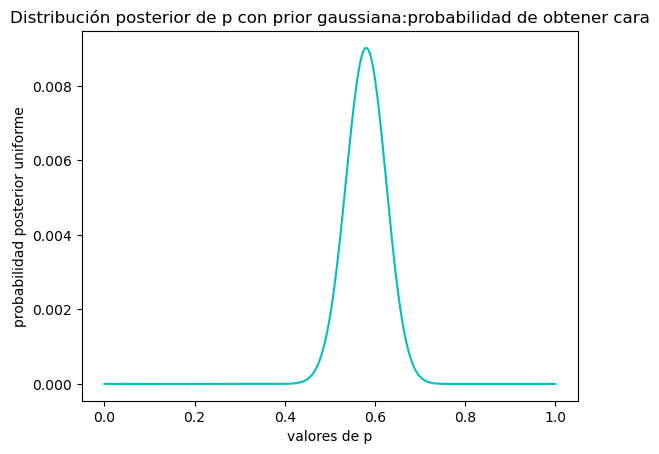

In [109]:
#Grafiquemos la probabilidad uniforme en principio
valores_p=np.linspace(0,1,1000)
probabilidades_gauss = [] 
for p in valores_p:
    probabilidad = probabilidad_posterior_gaussiana(p, caras, Tiros)
    probabilidades_gauss.append(probabilidad)
p_gauss_norm=probabilidades_gauss/np.sum(probabilidades_gauss)
plt.plot(valores_p,p_gauss_norm,color='#00BFBF')
plt.xlabel('valores de p')
plt.ylabel('probabilidad posterior uniforme')
plt.title('Distribución posterior de p con prior gaussiana:probabilidad de obtener cara')

plt.show()

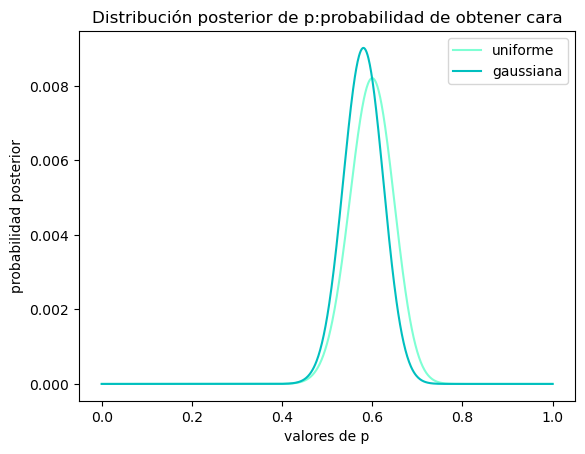

0.001
0.0009999999999999998


In [110]:
plt.plot(valores_p,p_unif_norm,color='aquamarine',label='uniforme')
plt.plot(valores_p,p_gauss_norm,color='#00BFBF',label='gaussiana')
plt.xlabel('valores de p')
plt.ylabel('probabilidad posterior')
plt.title('Distribución posterior de p:probabilidad de obtener cara')
plt.legend()
plt.show()
media_gauss=np.mean(p_gauss_norm)
media_unif=np.mean(p_unif_norm)
print(media_gauss)
print(media_unif)

 Ejercicio 8. Frecuentistas vs Bayesianos
Supongase que se mide el tiempo de decaimiento de una part ́ıcula, el cual es modelado como una
funcion exponencial con constante de decaimiento λ.
 Simule 50 mediciones del tiempo de decaimiento
 Estime λ utilizando el estimador de Maximum Likelihood
 Estime λ utilizando inferencia Bayesiana asumiendo un prior plano
 Compare las dos estimaciones.

 Sabemos que el tiempo de decaimiento de una partícula sigue una distribución exponencial, la cual está dada por:

**PDF (Función de Densidad de Probabilidad):**

$$
P(t; \lambda) = \lambda e^{-\lambda t} \quad \text{para} \quad t \geq 0
$$

**CDF (Función de Distribución Acumulada):**

$$
F(t; \lambda) = 1 - e^{-\lambda t} \quad \text{para} \quad t \geq 0
$$


Sabemos que el tiempo de decaimiento de una partícula sigue una distribución exponencial, la cual está dada por:

$$
P(t;\lambda) = \lambda e^{-\lambda t}
$$

Donde \( t \) es el tiempo de decaimiento y \( \lambda \) es la constante de decaimiento. Usaremos la función inversa de la CDF para generar las mediciones. Si generamos números aleatorios uniformemente distribuidos \( y \), podemos obtener muestras de la distribución exponencial como:

$$
t = -\frac{\ln(1 - y)}{\lambda}
$$

Donde \( y \) es un número aleatorio entre 0 y 1.


 La función de verosimilitud para una muestra de tiempos de decaimiento \( t_i \) es:

$$
L(\lambda) = \prod_{i=1}^{N} \lambda e^{-\lambda t_i}
$$

Maximizar esta verosimilitud con respecto a \( \lambda \) nos da el estimador de máxima verosimilitud:

$$
\hat{\lambda}_{\text{MLE}} = \frac{N}{\sum_{i=1}^N t_i}
$$
Asumimos un prior plano (uniforme) en \( \lambda \). La probabilidad posterior es proporcional a la verosimilitud, así que podemos calcular la probabilidad posterior como:

$$
P(\lambda | \{t_i\}) \propto L(\lambda)
$$

Para esto, podemos calcular la posterior en un rango de valores de \( \lambda \) y encontrar el valor de \( \lambda \) que maximiza la posterior.


In [111]:
#Primero defino las funciones 
#Función de Densidad de Probabilidad
def pdf(t,lam):
    y=lam*(np.exp(-lam*t))
    return(y)

In [112]:
#Función de Distribución Acumulada
def cdf(t,lam):
    y=(1-np.exp(-lam*t))
    return(y)

In [113]:
# Inversa de la Función de Distribución Acumulada
def inv_cdf(y,lam):
    t=-(np.log(1-y))/lam
    return(t)

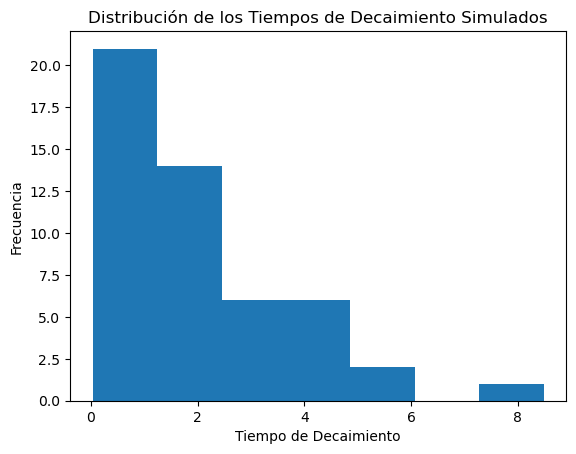

Estimación de $\lambda$ (MLE): 0.4936384244963183


In [114]:
#Vamos a generar 50 mediciones de tiempos de decaimiento usando la función inversa de la CDF
#valores random
n=50 #Define la cantidad de mediciones de tiempo de decaimiento
valores_random=np.random.uniform(0,1,n) #Genera n valores aleatorios uniformemente distribuidos entre 0 y 1, que representarán los valores y en la función inversa de la CDF.
lam=0.5 #valor_real_lambda
tiempo_decaimiento=inv_cdf(valores_random,lam) #Utiliza la función inversa de la CDF para convertir los valores aleatorios generados en tiempos de decaimiento simulados
#Para una distribución exponencial, el MLE de λ es el inverso del promedio de los tiempos de decaimiento simulados.
lambda_mle=1/np.mean(tiempo_decaimiento)
plt.hist(tiempo_decaimiento,bins='auto')
plt.xlabel('Tiempo de Decaimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Tiempos de Decaimiento Simulados')
plt.show()
print(r'Estimación de $\lambda$ (MLE):', lambda_mle)

In [ ]:
def pdf(t, lam):
    y = lam * np.exp(-lam * t)
    print(f"PDF for lambda={lam}: {y}")  # Esto imprimirá las probabilidades
    return y



<function __main__.pdf(t, lam)>

In [141]:
#A continuacion, queremos estimar lambda a partir de Maximum Likelihood.
#Tenemos que definir en principio la funcion likelihood

def log_likelihood(t, lam):
    L_lam = np.sum(np.log(pdf(t, lam)))  # log de las probabilidades de los tiempos de decaimiento
    return L_lam


In [136]:
#Definimos los prior planos segun la funcion likelihood
def priors_plano(lam):
    if 0 <= lam <= 1: 
        return 1  # Prior uniforme, constante en [0, 1]
    else:
        return 0

In [137]:
#Ahora para definir la probabilidad posterior solo se multiplica el likelihood por el prior
def probabilidad_posterior(t, lam):
    L = np.exp(log_likelihood(t, lam))  # Convertir log-likelihood a likelihood
    P = priors_plano(lam)
    prob_post = L * P
    return prob_post

PDF for lambda=0.0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
PDF for lambda=0.001001001001001001: [0.00099623 0.00100045 0.00100069 0.00099965 0.00099253 0.00100045
 0.00099877 0.00099813 0.00100046 0.00099839 0.00100008 0.000999
 0.00099899 0.00099946 0.00100081 0.00099739 0.00100023 0.00100059
 0.00100092 0.00099921 0.00099874 0.00100097 0.00099956 0.00100049
 0.00099893 0.00100062 0.00099865 0.00100002 0.00099548 0.0010007
 0.00100017 0.00100076 0.00099583 0.0009968  0.0010004  0.00099884
 0.0009976  0.00099938 0.00099949 0.00100045 0.00100081 0.00099645
 0.00099639 0.00099899 0.00100017 0.00100014 0.00099841 0.00099645
 0.00099664 0.00099797]
PDF for lambda=0.002002002002002002: [0.00198294 0.00199981 0.00200075 0.00199662 0.00196827 0.00199978
 0.00199308 0.00199054 0.00199983 0.00199159 0.00199833 0.001994
 0.00199397 0.00199586 0.00200124 0.0019876  0.0019989  0.00200

/tmp/ipykernel_8008/3864157470.py:5: RuntimeWarning: divide by zero encountered in log
  L_lam = np.sum(np.log(pdf(t, lam)))  # log de las probabilidades de los tiempos de decaimiento


PDF for lambda=0.7557557557557557: [0.02042843 0.49958356 0.59652434 0.27357374 0.00123715 0.49710967
 0.14007088 0.08652043 0.5014957  0.10548811 0.37790988 0.16657494
 0.1657376  0.23693992 0.65503272 0.04947603 0.42117568 0.5531857
 0.70966597 0.19573504 0.13658011 0.73688753 0.25544608 0.51261527
 0.15784355 0.56572396 0.12810913 0.36091827 0.01165141 0.6043168
 0.40230792 0.62996567 0.01516002 0.03169195 0.48144548 0.14799166
 0.05791223 0.22211469 0.24168041 0.49731091 0.6519736  0.02426035
 0.02312703 0.16603044 0.40418884 0.3948168  0.10681719 0.024298
 0.02796381 0.07670382]
PDF for lambda=0.7567567567567568: [0.02035789 0.49997107 0.59712729 0.27356765 0.0012283  0.49749199
 0.13994363 0.08638669 0.50188723 0.1053527  0.37806322 0.16646181
 0.16562393 0.23688953 0.65577606 0.049363   0.42140707 0.55368952
 0.7105467  0.1956439  0.13645146 0.73783883 0.2554172  0.51303038
 0.15772511 0.56625601 0.12797761 0.36104271 0.01160254 0.60493802
 0.40250451 0.63064798 0.01510171 0.031

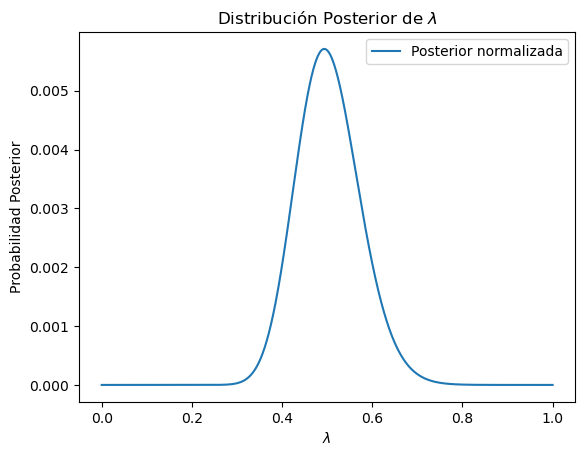

Esta es la media de la probabilidad posterior: 1.581346235349307e-38
Esta es la desviacion estandar de la probabilidad posterior: 2.754803421974584e-38


In [143]:
#Vamos a estimar lambda a partir de la funcion log_likelihood
lambda_rango = np.linspace(0, 1, 1000)
posterior = []

for lam in lambda_rango:
    posteriores = probabilidad_posterior(tiempo_decaimiento, lam)
    posterior.append(posteriores)

posteriori_norm = posterior / np.sum(posterior)


# Graficar la distribución posterior
plt.plot(lambda_rango, posteriori_norm, label='Posterior normalizada')
plt.xlabel(r'$\lambda$')
plt.ylabel('Probabilidad Posterior')
plt.title(r'Distribución Posterior de $\lambda$')
plt.legend()
plt.show()
media_post=np.mean(posterior)
desv_post=np.std(posterior)
print('Esta es la media de la probabilidad posterior:',media_post)
print('Esta es la desviacion estandar de la probabilidad posterior:',desv_post)

Estimación de $\lambda$ (Bayesiana): 0.49369369369369376


<>:29: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_8008/415641833.py:29: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Distribución Posterior de $\lambda$ con Prior Plano')


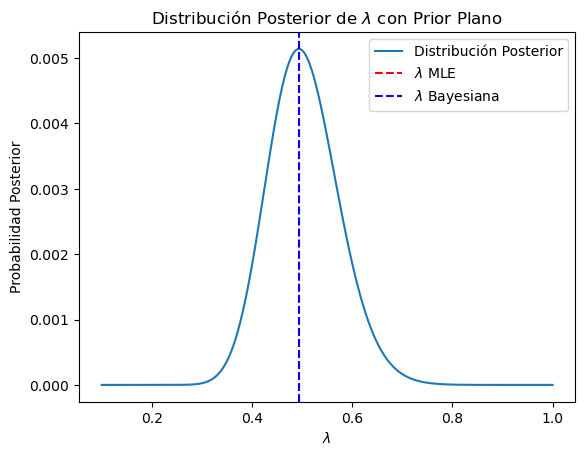

In [119]:
# Definición del rango de lambda
lambda_range = np.linspace(0.1, 1, 1000)  # Rango para la estimación de lambda
posterior = []

# Función de log-verosimilitud para los datos y un valor de lambda
def log_likelihood(data, lam):
    return np.sum(np.log(pdf(data, lam)))

# Cálculo de la probabilidad posterior para cada valor de lambda en el rango
for lam in lambda_range:
    posterior.append(log_likelihood(tiempo_decaimiento, lam))

# Convertir a numpy array para normalizar la posterior
posterior = np.array(posterior)
posterior = posterior - np.max(posterior)  # Para evitar overflow numérico
posterior = np.exp(posterior)  # Convertir de log-posterior a posterior real
posterior /= np.sum(posterior)  # Normalizar la posterior

# Estimación de lambda bayesiana
lambda_bayes = lambda_range[np.argmax(posterior)]
print(r'Estimación de $\lambda$ (Bayesiana):', lambda_bayes)

# Graficar la distribución posterior de lambda
plt.plot(lambda_range, posterior, label='Distribución Posterior')
plt.axvline(lambda_mle, color='red', linestyle='--', label=r'$\lambda$ MLE')
plt.axvline(lambda_bayes, color='blue', linestyle='--', label=r'$\lambda$ Bayesiana')
plt.xlabel(r'$\lambda$')
plt.ylabel('Probabilidad Posterior')
plt.title('Distribución Posterior de $\lambda$ con Prior Plano')
plt.legend()
plt.show()


Estimación de lambda (MLE): 0.4795622946257282
Estimación de lambda (Bayesiana): 0.4797797797797798


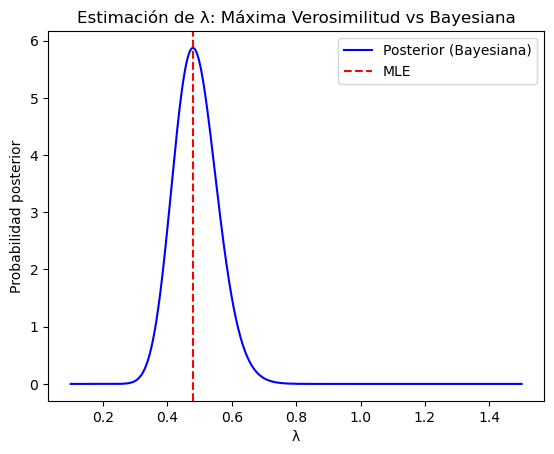

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro real de decaimiento (constante de tiempo de vida media)
lambda_real = 0.5

# Paso 1: Simulación de 50 tiempos de decaimiento
np.random.seed(0)  # Para reproducibilidad
n = 50
decay_times = np.random.exponential(1/lambda_real, n)

# Paso 2: Estimación de lambda mediante Máxima Verosimilitud
lambda_mle = n / np.sum(decay_times)
print("Estimación de lambda (MLE):", lambda_mle)

# Paso 3: Estimación de lambda mediante Inferencia Bayesiana con prior plano
# Rango de valores para lambda
lambda_range = np.linspace(0.1, 1.5, 1000)

# Calcular la verosimilitud para cada valor de lambda
likelihood = lambda_range ** n * np.exp(-lambda_range * np.sum(decay_times))

# Normalizar la posterior para que sea una distribución de probabilidad
posterior = likelihood / np.trapz(likelihood, lambda_range)

# Encontrar el valor de lambda que maximiza la posterior
lambda_bayes = lambda_range[np.argmax(posterior)]
print("Estimación de lambda (Bayesiana):", lambda_bayes)

# Paso 4: Comparación de resultados
plt.plot(lambda_range, posterior, label="Posterior (Bayesiana)", color="blue")
plt.axvline(lambda_mle, color="red", linestyle="--", label="MLE")
plt.xlabel("λ")
plt.ylabel("Probabilidad posterior")
plt.title("Estimación de λ: Máxima Verosimilitud vs Bayesiana")
plt.legend()
plt.show()


Estimación de lambda usando MLE: 2.3642
Estimación de lambda usando Inferencia Bayesiana: 2.3642


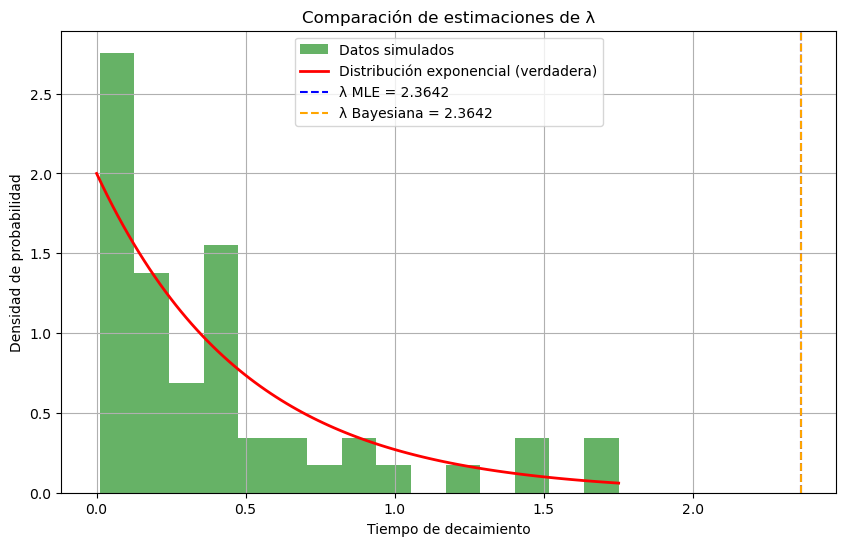

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro verdadero de lambda
lambda_true = 2.0

# Número de mediciones
n = 50

# Simulación de los tiempos de decaimiento
np.random.seed(42)
decay_times = np.random.exponential(1/lambda_true, n)

# Estimación de Maximum Likelihood (MLE)
lambda_mle = n / np.sum(decay_times)

# Estimación Bayesiana (posterior con prior plano)
lambda_bayes = n / np.sum(decay_times)  # Al ser prior plano, es igual al MLE

# Mostrar resultados
print(f"Estimación de lambda usando MLE: {lambda_mle:.4f}")
print(f"Estimación de lambda usando Inferencia Bayesiana: {lambda_bayes:.4f}")

# Graficar los resultados de las mediciones y las estimaciones
plt.figure(figsize=(10, 6))
plt.hist(decay_times, bins=15, density=True, alpha=0.6, color='g', label='Datos simulados')
x = np.linspace(0, np.max(decay_times), 100)
plt.plot(x, lambda_true * np.exp(-lambda_true * x), label='Distribución exponencial (verdadera)', color='r', lw=2)
plt.axvline(lambda_mle, color='b', linestyle='dashed', label=f'λ MLE = {lambda_mle:.4f}')
plt.axvline(lambda_bayes, color='orange', linestyle='dashed', label=f'λ Bayesiana = {lambda_bayes:.4f}')
plt.xlabel('Tiempo de decaimiento')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.title('Comparación de estimaciones de λ')
plt.grid(True)
plt.show()
